In [164]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time

In [165]:
# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

In [166]:
# Load Mammographic Mass Data Set
mammographic_data = pd.read_csv("mammographic_masses.data")
# Data preprocessing
# Handle missing values
mammographic_data.replace('?', np.nan, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
mammographic_data_imputed = pd.DataFrame(imputer.fit_transform(mammographic_data), columns=mammographic_data.columns)

# Encode categorical variables
label_encoder = LabelEncoder()
mammographic_data_encoded = mammographic_data_imputed.apply(label_encoder.fit_transform)

# Split data into features and target
X_mammographic = mammographic_data_encoded.iloc[:, :-1]  # Features
y_mammographic = mammographic_data_encoded.iloc[:, -1]   # Target variable

# Standardize features
scaler = StandardScaler()
X_mammographic_scaled = scaler.fit_transform(X_mammographic)

In [167]:
# Split datasets into training and testing sets
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)
X_mammographic_train, X_mammographic_test, y_mammographic_train, y_mammographic_test = train_test_split(X_mammographic_scaled, y_mammographic, test_size=0.2, random_state=42)

In [168]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
bagging = BaggingClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
estimators = [('random_forest', random_forest),('bagging', bagging),('adaboost', adaboost),('gradient_boosting', gradient_boosting)]
voting = VotingClassifier(estimators)

In [169]:
# Train classifiers and measure time
start_time = time.time()
random_forest.fit(X_digits_train, y_digits_train)
rf_training_time = time.time() - start_time

start_time = time.time()
bagging.fit(X_digits_train, y_digits_train)
bagging_training_time = time.time() - start_time

start_time = time.time()
adaboost.fit(X_digits_train, y_digits_train)
adaboost_training_time = time.time() - start_time

start_time = time.time()
gradient_boosting.fit(X_digits_train, y_digits_train)
gradient_boosting_training_time = time.time() - start_time

start_time = time.time()
voting.fit(X_digits_train, y_digits_train)
voting_training_time = time.time() - start_time

In [170]:
# Predictions
y_digits_pred_rf = random_forest.predict(X_digits_test)
y_digits_pred_bagging = bagging.predict(X_digits_test)
y_digits_pred_adaboost = adaboost.predict(X_digits_test)
y_digits_pred_gradient_boosting = gradient_boosting.predict(X_digits_test)
y_digits_pred_voting = voting.predict(X_digits_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_digits_test, y_digits_pred_rf)
accuracy_bagging = accuracy_score(y_digits_test, y_digits_pred_bagging)
accuracy_adaboost = accuracy_score(y_digits_test, y_digits_pred_adaboost)
accuracy_gradient_boosting = accuracy_score(y_digits_test, y_digits_pred_gradient_boosting)
accuracy_voting = accuracy_score(y_digits_test, y_digits_pred_voting)

# Cross-validation scores
cross_val_scores_rf = cross_val_score(random_forest, X_digits, y_digits, cv=5)
cross_val_scores_bagging = cross_val_score(bagging, X_digits, y_digits, cv=5)
cross_val_scores_adaboost = cross_val_score(adaboost, X_digits, y_digits, cv=5)
cross_val_scores_gradient_boosting = cross_val_score(gradient_boosting, X_digits, y_digits, cv=5)
cross_val_scores_voting = cross_val_score(voting, X_digits, y_digits, cv=5)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_digits_test, y_digits_pred_rf)
mse_bagging = mean_squared_error(y_digits_test, y_digits_pred_bagging)
mse_adaboost = mean_squared_error(y_digits_test, y_digits_pred_adaboost)
mse_gradient_boosting = mean_squared_error(y_digits_test, y_digits_pred_gradient_boosting)
mse_voting = mean_squared_error(y_digits_test, y_digits_pred_voting)


In [171]:
# Print accuracy, MSE, training times, and cross-validation scores
print("Random Forest Accuracy:", accuracy_rf)
print("Bagging Accuracy:", accuracy_bagging)
print("AdaBoost Accuracy:", accuracy_adaboost)
print("Gradient Boosting Accuracy:", accuracy_gradient_boosting)
print("Voting Accuracy:", accuracy_voting)
print("---------------------------------------------------------")

print("Random Forest MSE:", mse_rf)
print("Bagging MSE:", mse_bagging)
print("AdaBoost MSE:", mse_adaboost)
print("Gradient Boosting MSE:", mse_gradient_boosting)
print("Voting MSE:", mse_voting)
print("---------------------------------------------------------")

print("Random Forest Training Time:", rf_training_time)
print("Bagging Training Time:", bagging_training_time)
print("AdaBoost Training Time:", adaboost_training_time)
print("Gradient Boosting Training Time:", gradient_boosting_training_time)
print("Voting Training Time:", voting_training_time)
print("---------------------------------------------------------")

print("Random Forest Cross-validation Scores:", cross_val_scores_rf)
print("Bagging Cross-validation Scores:", cross_val_scores_bagging)
print("AdaBoost Cross-validation Scores:", cross_val_scores_adaboost)
print("Gradient Boosting Cross-validation Scores:", cross_val_scores_gradient_boosting)
print("Voting Cross-validation Scores:", cross_val_scores_voting)

Random Forest Accuracy: 0.9722222222222222
Bagging Accuracy: 0.9416666666666667
AdaBoost Accuracy: 0.21944444444444444
Gradient Boosting Accuracy: 0.9694444444444444
Voting Accuracy: 0.9666666666666667
---------------------------------------------------------
Random Forest MSE: 0.37777777777777777
Bagging MSE: 1.0361111111111112
AdaBoost MSE: 18.613888888888887
Gradient Boosting MSE: 0.24166666666666667
Voting MSE: 0.5444444444444444
---------------------------------------------------------
Random Forest Training Time: 0.5066230297088623
Bagging Training Time: 1.5906505584716797
AdaBoost Training Time: 0.46328306198120117
Gradient Boosting Training Time: 7.5383100509643555
Voting Training Time: 20.905022144317627
---------------------------------------------------------
Random Forest Cross-validation Scores: [0.93055556 0.91111111 0.95821727 0.96935933 0.9275766 ]
Bagging Cross-validation Scores: [0.91388889 0.88611111 0.93314763 0.94428969 0.89415042]
AdaBoost Cross-validation Scores:

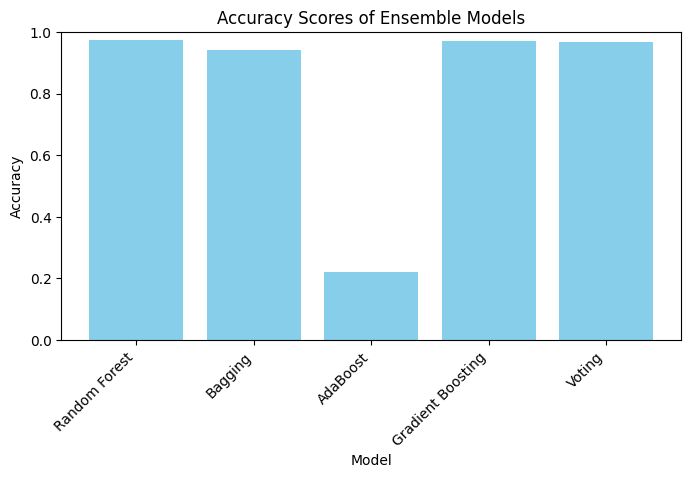

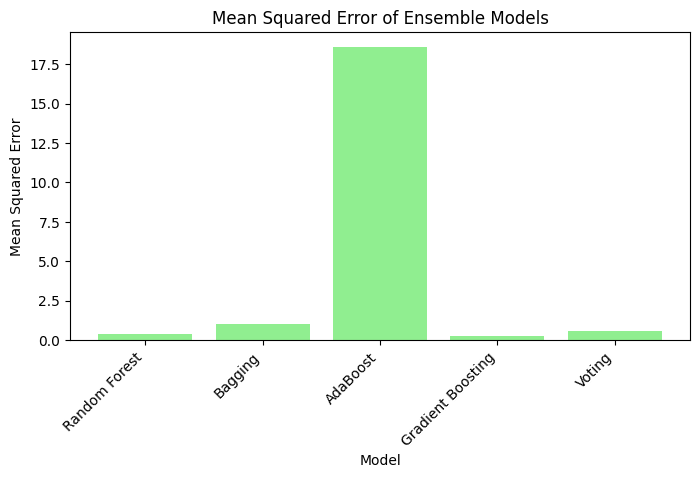

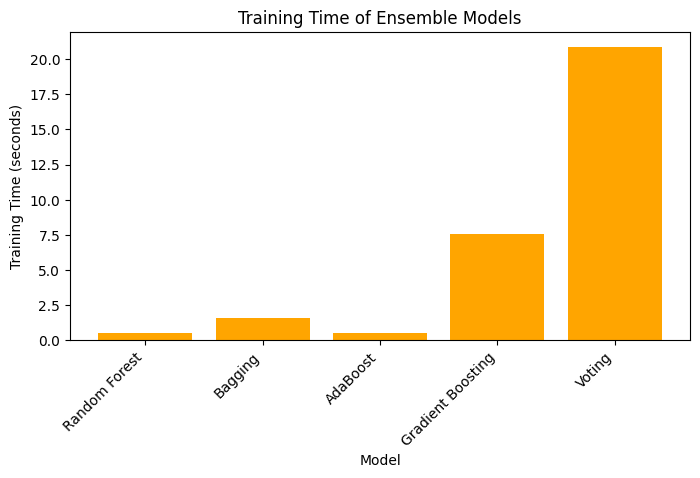

In [172]:
import matplotlib.pyplot as plt

# Define metrics
accuracy_scores = [accuracy_rf, accuracy_bagging, accuracy_adaboost, accuracy_gradient_boosting, accuracy_voting]
mse_scores = [mse_rf, mse_bagging, mse_adaboost, mse_gradient_boosting, mse_voting]
training_times = [rf_training_time, bagging_training_time, adaboost_training_time, gradient_boosting_training_time, voting_training_time]
models = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'Voting']

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Ensemble Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(8, 4))
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Ensemble Models')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(8, 4))
plt.bar(models, training_times, color='orange')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Ensemble Models')
plt.xticks(rotation=45, ha='right')
plt.show()


In [173]:
# Train classifiers and measure time
start_time = time.time()
random_forest.fit(X_mammographic_train, y_mammographic_train)
rf_training_time = time.time() - start_time

start_time = time.time()
bagging.fit(X_mammographic_train, y_mammographic_train)
bagging_training_time = time.time() - start_time

start_time = time.time()
adaboost.fit(X_mammographic_train, y_mammographic_train)
adaboost_training_time = time.time() - start_time

start_time = time.time()
gradient_boosting.fit(X_mammographic_train, y_mammographic_train)
gradient_boosting_training_time = time.time() - start_time

start_time = time.time()
voting.fit(X_mammographic_train, y_mammographic_train)
voting_training_time = time.time() - start_time

In [174]:
# Predictions
y_mammographic_pred_rf = random_forest.predict(X_mammographic_test)
y_mammographic_pred_bagging = bagging.predict(X_mammographic_test)
y_mammographic_pred_adaboost = adaboost.predict(X_mammographic_test)
y_mammographic_pred_gradient_boosting = gradient_boosting.predict(X_mammographic_test)
y_mammographic_pred_voting = voting.predict(X_mammographic_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_mammographic_test, y_mammographic_pred_rf)
accuracy_bagging = accuracy_score(y_mammographic_test, y_mammographic_pred_bagging)
accuracy_adaboost = accuracy_score(y_mammographic_test, y_mammographic_pred_adaboost)
accuracy_gradient_boosting = accuracy_score(y_mammographic_test, y_mammographic_pred_gradient_boosting)
accuracy_voting = accuracy_score(y_mammographic_test, y_mammographic_pred_voting)

# Cross-validation scores
cross_val_scores_rf = cross_val_score(random_forest, X_mammographic, y_mammographic, cv=5)
cross_val_scores_bagging = cross_val_score(bagging, X_mammographic, y_mammographic, cv=5)
cross_val_scores_adaboost = cross_val_score(adaboost, X_mammographic, y_mammographic, cv=5)
cross_val_scores_gradient_boosting = cross_val_score(gradient_boosting, X_mammographic, y_mammographic, cv=5)
cross_val_scores_voting = cross_val_score(voting, X_mammographic, y_mammographic, cv=5)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_mammographic_test, y_mammographic_pred_rf)
mse_bagging = mean_squared_error(y_mammographic_test, y_mammographic_pred_bagging)
mse_adaboost = mean_squared_error(y_mammographic_test, y_mammographic_pred_adaboost)
mse_gradient_boosting = mean_squared_error(y_mammographic_test, y_mammographic_pred_gradient_boosting)
mse_voting = mean_squared_error(y_mammographic_test, y_mammographic_pred_voting)

In [175]:
# Print accuracy, MSE, training times, and cross-validation scores
print("Random Forest Accuracy:", accuracy_rf)
print("Bagging Accuracy:", accuracy_bagging)
print("AdaBoost Accuracy:", accuracy_adaboost)
print("Gradient Boosting Accuracy:", accuracy_gradient_boosting)
print("Voting Accuracy:", accuracy_voting)
print("---------------------------------------------------------")

print("Random Forest MSE:", mse_rf)
print("Bagging MSE:", mse_bagging)
print("AdaBoost MSE:", mse_adaboost)
print("Gradient Boosting MSE:", mse_gradient_boosting)
print("Voting MSE:", mse_voting)
print("---------------------------------------------------------")

print("Random Forest Training Time:", rf_training_time)
print("Bagging Training Time:", bagging_training_time)
print("AdaBoost Training Time:", adaboost_training_time)
print("Gradient Boosting Training Time:", gradient_boosting_training_time)
print("Voting Training Time:", voting_training_time)
print("---------------------------------------------------------")

print("Random Forest Cross-validation Scores:", cross_val_scores_rf)
print("Bagging Cross-validation Scores:", cross_val_scores_bagging)
print("AdaBoost Cross-validation Scores:", cross_val_scores_adaboost)
print("Gradient Boosting Cross-validation Scores:", cross_val_scores_gradient_boosting)
print("Voting Cross-validation Scores:", cross_val_scores_voting)

Random Forest Accuracy: 0.78125
Bagging Accuracy: 0.78125
AdaBoost Accuracy: 0.828125
Gradient Boosting Accuracy: 0.8333333333333334
Voting Accuracy: 0.8125
---------------------------------------------------------
Random Forest MSE: 0.21875
Bagging MSE: 0.21875
AdaBoost MSE: 0.171875
Gradient Boosting MSE: 0.16666666666666666
Voting MSE: 0.1875
---------------------------------------------------------
Random Forest Training Time: 0.3926224708557129
Bagging Training Time: 0.48410463333129883
AdaBoost Training Time: 0.3140740394592285
Gradient Boosting Training Time: 0.19572114944458008
Voting Training Time: 1.4206063747406006
---------------------------------------------------------
Random Forest Cross-validation Scores: [0.77083333 0.83854167 0.84375    0.79166667 0.77083333]
Bagging Cross-validation Scores: [0.75520833 0.828125   0.84895833 0.77604167 0.78125   ]
AdaBoost Cross-validation Scores: [0.80208333 0.859375   0.83333333 0.80729167 0.765625  ]
Gradient Boosting Cross-validat

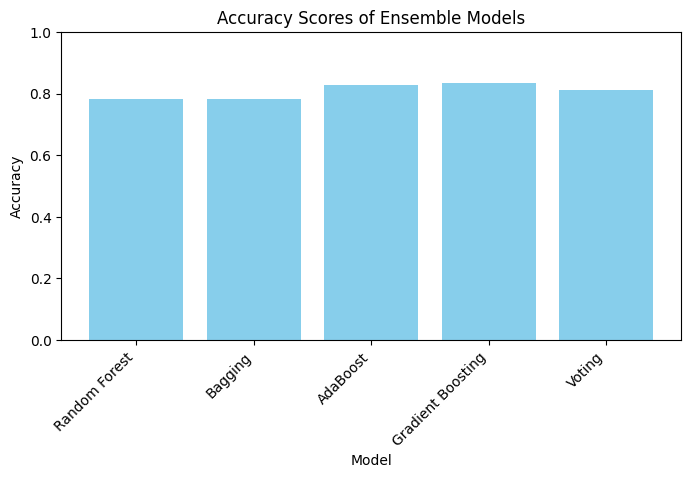

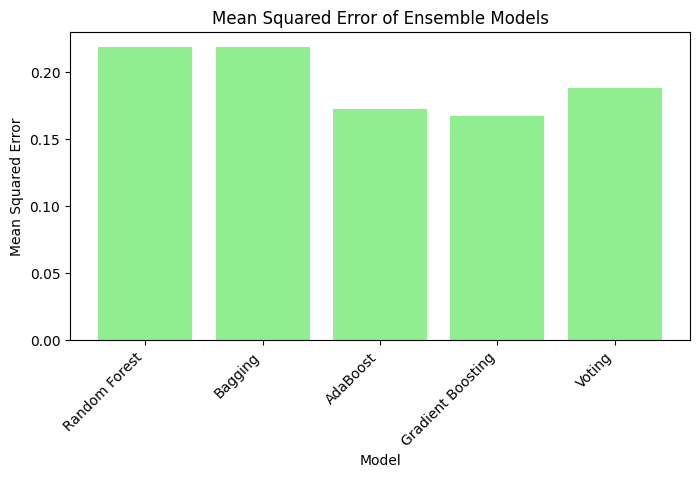

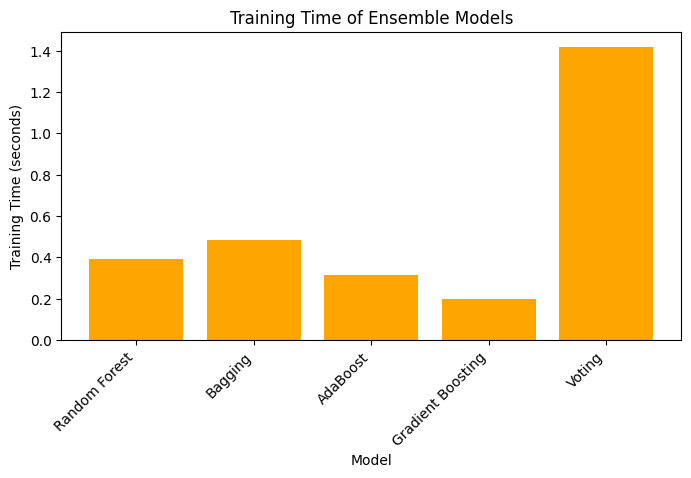

In [176]:
import matplotlib.pyplot as plt

# Define metrics
accuracy_scores = [accuracy_rf, accuracy_bagging, accuracy_adaboost, accuracy_gradient_boosting, accuracy_voting]
mse_scores = [mse_rf, mse_bagging, mse_adaboost, mse_gradient_boosting, mse_voting]
training_times = [rf_training_time, bagging_training_time, adaboost_training_time, gradient_boosting_training_time, voting_training_time]
models = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'Voting']

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Ensemble Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(8, 4))
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Ensemble Models')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(8, 4))
plt.bar(models, training_times, color='orange')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Ensemble Models')
plt.xticks(rotation=45, ha='right')
plt.show()


In [193]:
n_estimators = [10,50,100,500,1000]
times_digits = []
accuracies_digits = []
mses_digits = []
cross_vals_digits = []
for n_estimator in n_estimators:
    random_forest = RandomForestClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    random_forest.fit(X_digits_train, y_digits_train)
    rf_training_time = time.time() - start_time
    times_digits.append(rf_training_time)
    y_digits_pred_rf = random_forest.predict(X_digits_test)
    accuracy_rf = accuracy_score(y_digits_test, y_digits_pred_rf)
    accuracies_digits.append(accuracy_rf)
    cross_val_scores_rf = cross_val_score(random_forest, X_digits, y_digits, cv=5)
    cross_vals_digits.append(cross_val_scores_rf)
    mse_rf = mean_squared_error(y_digits_test, y_digits_pred_rf)
    mses_digits.append(mse_rf)

In [194]:
times_mammographic = []
accuracies_mammographic = []
mses_mammographic = []
cross_vals_mammographic = []
for n_estimator in n_estimators:
    random_forest = RandomForestClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    random_forest.fit(X_mammographic_train, y_mammographic_train)
    rf_training_time = time.time() - start_time
    times_mammographic.append(rf_training_time)
    y_mammographic_pred_rf = random_forest.predict(X_mammographic_test)
    accuracy_rf = accuracy_score(y_mammographic_test, y_mammographic_pred_rf)
    accuracies_mammographic.append(accuracy_rf)
    cross_val_scores_rf = cross_val_score(random_forest, X_mammographic, y_mammographic, cv=5)
    cross_vals_mammographic.append(cross_val_scores_rf)
    mse_rf = mean_squared_error(y_mammographic_test, y_mammographic_pred_rf)
    mses_mammographic.append(mse_rf)

In [195]:
for i in range(len(n_estimators)):
    print("Number of estimators = ", n_estimators[i])
    print("--------------------------------------------------------------------")
    print(f"Random Forest Accuracy: {accuracies_digits[i]:.2f} (Digits), {accuracies_mammographic[i]:.2f} (Mammographic)")
    print(f"Random Forest MSE: {mses_digits[i]:.2f} (Digits), {mses_mammographic[i]:.2f} (Mammographic)")
    print(f"Random Forest Training Time: {times_digits[i]:.2f} (Digits), {times_mammographic[i]:.2f} (Mammographic)")
    print(f"Random Forest Cross-validation Scores: {[round(cross_vals_digits[i][j],2) for j in range(5)]} (Digits), {[round(cross_vals_mammographic[i][j],2) for j in range(5)]} (Mammographic)\n")

Dataset: Mammographic
Number of estimators =  10
--------------------------------------------------------------------
Random Forest Accuracy: 0.96 (Digits), 0.77 (Mammographic)
Random Forest MSE: 0.93 (Digits), 0.23 (Mammographic)
Random Forest Training Time: 0.06 (Digits), 0.03 (Mammographic)
Random Forest Cross-validation Scores: [0.91, 0.85, 0.94, 0.95, 0.89] (Digits), [0.78, 0.81, 0.82, 0.79, 0.78] (Mammographic)

Number of estimators =  50
--------------------------------------------------------------------
Random Forest Accuracy: 0.97 (Digits), 0.79 (Mammographic)
Random Forest MSE: 0.58 (Digits), 0.21 (Mammographic)
Random Forest Training Time: 0.13 (Digits), 0.06 (Mammographic)
Random Forest Cross-validation Scores: [0.93, 0.91, 0.96, 0.96, 0.94] (Digits), [0.77, 0.84, 0.85, 0.79, 0.78] (Mammographic)

Number of estimators =  100
--------------------------------------------------------------------
Random Forest Accuracy: 0.97 (Digits), 0.78 (Mammographic)
Random Forest MSE: 0.3

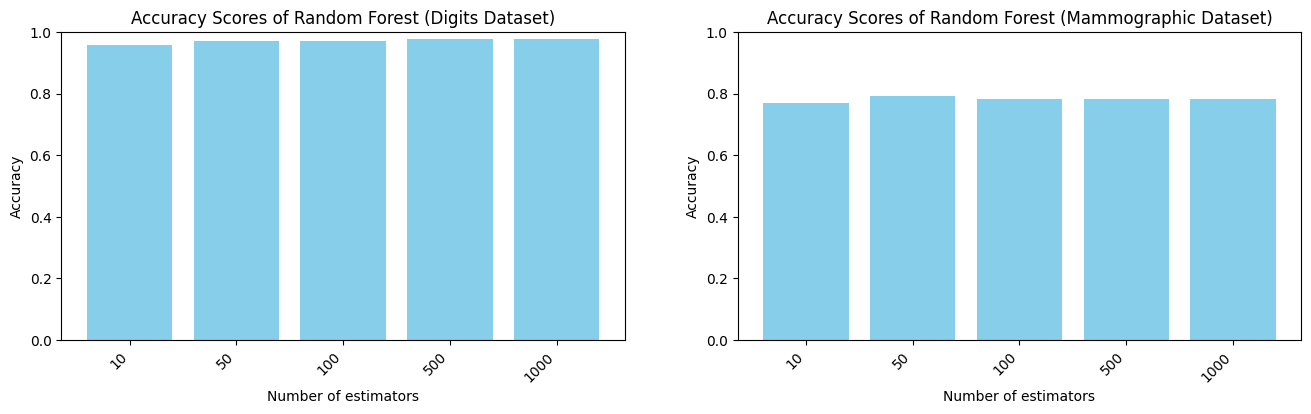

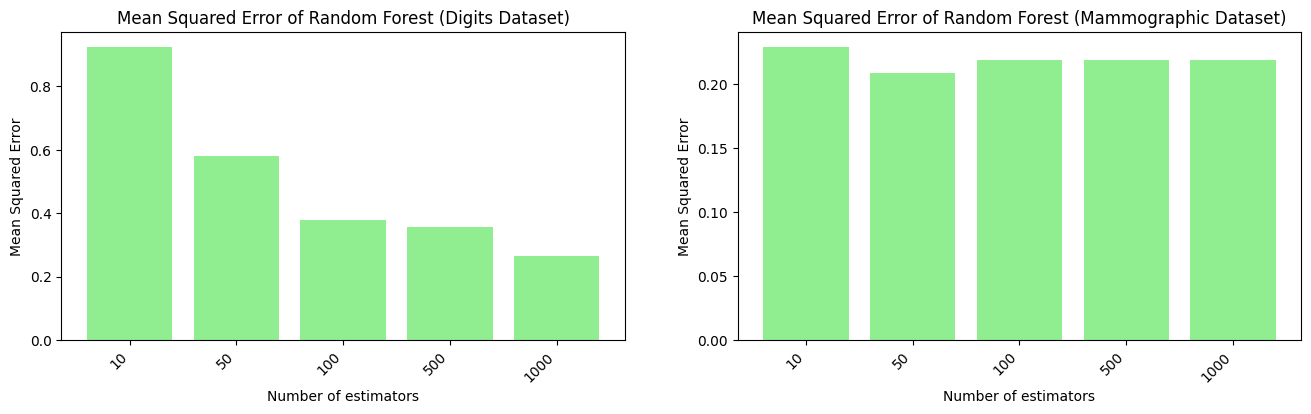

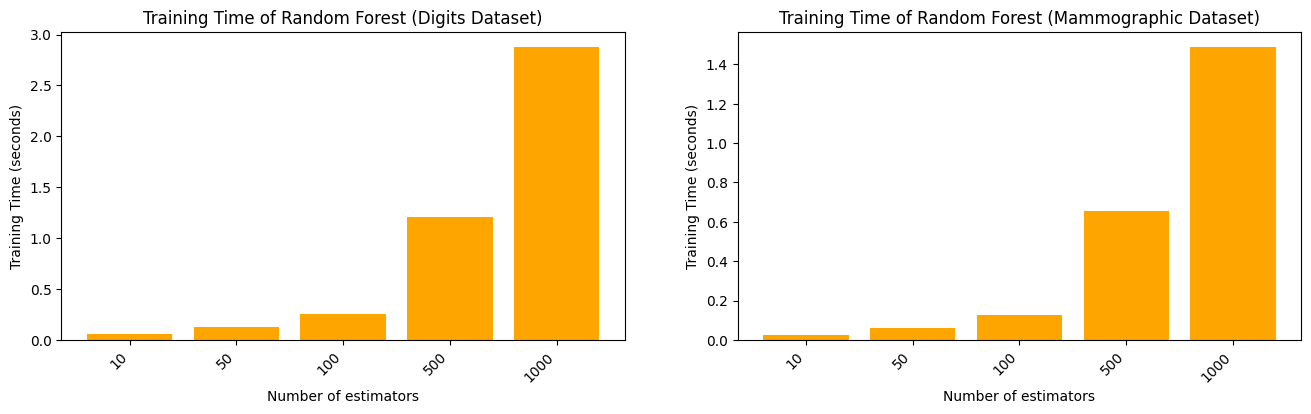

In [196]:
estimators = ['10','50','100','500','1000']
# Plot accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, accuracies_digits, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Random Forest (Digits Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, accuracies_mammographic, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Random Forest (Mammographic Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, mses_digits, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Random Forest (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, mses_mammographic, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Random Forest (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, times_digits, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Random Forest (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, times_mammographic, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Random Forest (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [197]:
n_estimators = [10,50,100,500,1000]
times_digits = []
accuracies_digits = []
mses_digits = []
cross_vals_digits = []
for n_estimator in n_estimators:
    bagging = BaggingClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    bagging.fit(X_digits_train, y_digits_train)
    bagging_training_time = time.time() - start_time
    times_digits.append(bagging_training_time)
    y_digits_pred_bagging = bagging.predict(X_digits_test)
    accuracy_bagging = accuracy_score(y_digits_test, y_digits_pred_bagging)
    accuracies_digits.append(accuracy_bagging)
    cross_val_scores_bagging = cross_val_score(bagging, X_digits, y_digits, cv=5)
    cross_vals_digits.append(cross_val_scores_bagging)
    mse_bagging = mean_squared_error(y_digits_test, y_digits_pred_bagging)
    mses_digits.append(mse_bagging)

In [198]:
times_mammographic = []
accuracies_mammographic = []
mses_mammographic = []
cross_vals_mammographic = []
for n_estimator in n_estimators:
    bagging = BaggingClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    bagging.fit(X_mammographic_train, y_mammographic_train)
    bagging_training_time = time.time() - start_time
    times_mammographic.append(bagging_training_time)
    y_mammographic_pred_bagging= bagging.predict(X_mammographic_test)
    accuracy_bagging = accuracy_score(y_mammographic_test, y_mammographic_pred_bagging)
    accuracies_mammographic.append(accuracy_bagging)
    cross_val_scores_bagging = cross_val_score(bagging, X_mammographic, y_mammographic, cv=5)
    cross_vals_mammographic.append(cross_val_scores_bagging)
    mse_bagging = mean_squared_error(y_mammographic_test, y_mammographic_pred_bagging)
    mses_mammographic.append(mse_bagging)

In [199]:
for i in range(len(n_estimators)):
    print("Number of estimators = ", n_estimators[i])
    print("--------------------------------------------------------------------")
    print(f"Bagging Accuracy: {accuracies_digits[i]:.2f} (Digits), {accuracies_mammographic[i]:.2f} (Mammographic)")
    print(f"Bagging MSE: {mses_digits[i]:.2f} (Digits), {mses_mammographic[i]:.2f} (Mammographic)")
    print(f"Bagging Training Time: {times_digits[i]:.2f} (Digits), {times_mammographic[i]:.2f} (Mammographic)")
    print(f"Bagging Cross-validation Scores: {[round(cross_vals_digits[i][j],2) for j in range(5)]} (Digits), {[round(cross_vals_mammographic[i][j],2) for j in range(5)]} (Mammographic)\n")

Number of estimators =  10
--------------------------------------------------------------------
Bagging Accuracy: 0.94 (Digits), 0.76 (Mammographic)
Bagging MSE: 1.01 (Digits), 0.24 (Mammographic)
Bagging Training Time: 0.14 (Digits), 0.03 (Mammographic)
Bagging Cross-validation Scores: [0.88, 0.86, 0.91, 0.92, 0.87] (Digits), [0.78, 0.8, 0.81, 0.77, 0.76] (Mammographic)

Number of estimators =  50
--------------------------------------------------------------------
Bagging Accuracy: 0.96 (Digits), 0.78 (Mammographic)
Bagging MSE: 0.72 (Digits), 0.22 (Mammographic)
Bagging Training Time: 0.94 (Digits), 0.08 (Mammographic)
Bagging Cross-validation Scores: [0.91, 0.9, 0.94, 0.93, 0.89] (Digits), [0.76, 0.83, 0.83, 0.77, 0.78] (Mammographic)

Number of estimators =  100
--------------------------------------------------------------------
Bagging Accuracy: 0.94 (Digits), 0.78 (Mammographic)
Bagging MSE: 1.04 (Digits), 0.22 (Mammographic)
Bagging Training Time: 1.61 (Digits), 0.20 (Mammogra

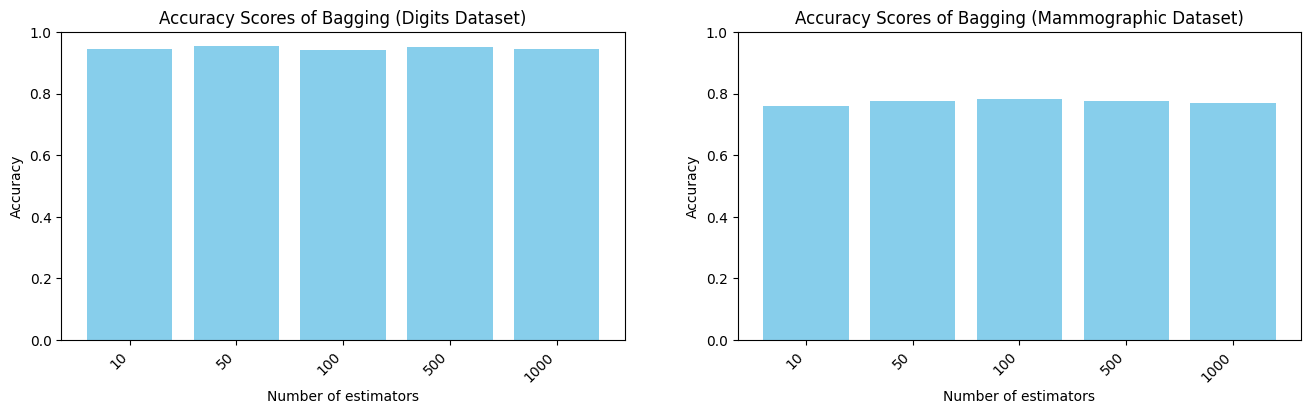

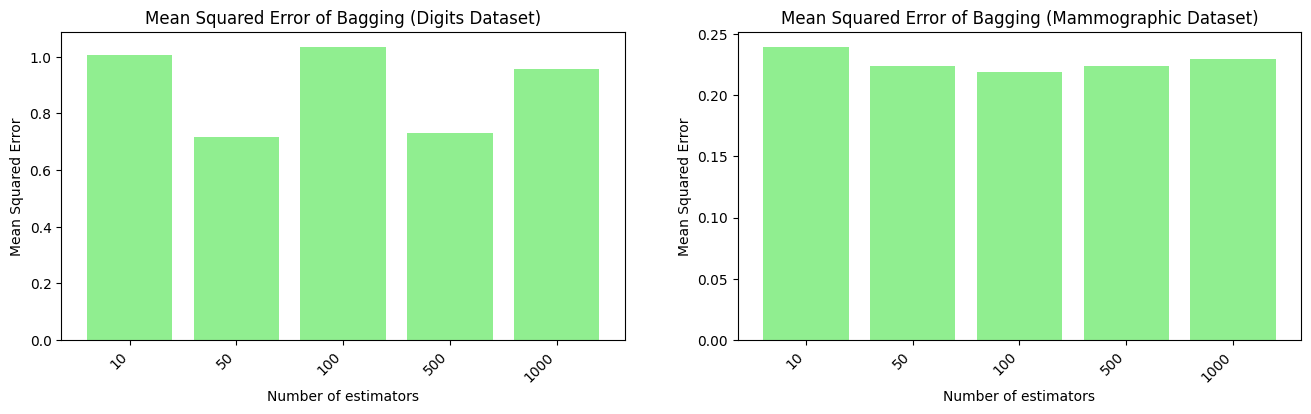

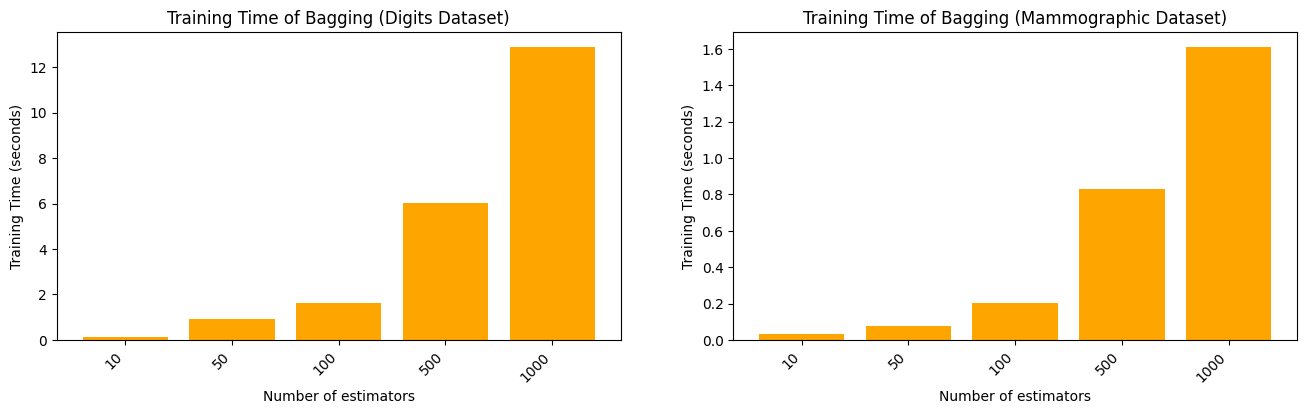

In [200]:
estimators = ['10','50','100','500','1000']
# Plot accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, accuracies_digits, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Bagging (Digits Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, accuracies_mammographic, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Bagging (Mammographic Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, mses_digits, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Bagging (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, mses_mammographic, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Bagging (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, times_digits, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Bagging (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, times_mammographic, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Bagging (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [201]:
n_estimators = [10,50,100,500,1000]
times_digits = []
accuracies_digits = []
mses_digits = []
cross_vals_digits = []
for n_estimator in n_estimators:
    gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    gradient_boosting.fit(X_digits_train, y_digits_train)
    gradient_boosting_training_time = time.time() - start_time
    times_digits.append(gradient_boosting_training_time)
    y_digits_pred_gradient_boosting = gradient_boosting.predict(X_digits_test)
    accuracy_gradient_boosting = accuracy_score(y_digits_test, y_digits_pred_gradient_boosting)
    accuracies_digits.append(accuracy_gradient_boosting)
    cross_val_scores_gradient_boosting = cross_val_score(gradient_boosting, X_digits, y_digits, cv=5)
    cross_vals_digits.append(cross_val_scores_gradient_boosting)
    mse_gradient_boosting = mean_squared_error(y_digits_test, y_digits_pred_gradient_boosting)
    mses_digits.append(mse_gradient_boosting)

In [202]:
times_mammographic = []
accuracies_mammographic = []
mses_mammographic = []
cross_vals_mammographic = []
for n_estimator in n_estimators:
    gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    gradient_boosting.fit(X_mammographic_train, y_mammographic_train)
    gradient_boosting_training_time = time.time() - start_time
    times_mammographic.append(gradient_boosting_training_time)
    y_mammographic_pred_gradient_boosting= gradient_boosting.predict(X_mammographic_test)
    accuracy_gradient_boosting = accuracy_score(y_mammographic_test, y_mammographic_pred_gradient_boosting)
    accuracies_mammographic.append(accuracy_gradient_boosting)
    cross_val_scores_gradient_boosting = cross_val_score(gradient_boosting, X_mammographic, y_mammographic, cv=5)
    cross_vals_mammographic.append(cross_val_scores_gradient_boosting)
    mse_gradient_boosting = mean_squared_error(y_mammographic_test, y_mammographic_pred_gradient_boosting)
    mses_mammographic.append(mse_gradient_boosting)

In [203]:
for i in range(len(n_estimators)):
    print("Number of estimators = ", n_estimators[i])
    print("--------------------------------------------------------------------")
    print(f"Gradient Boosting Accuracy: {accuracies_digits[i]:.2f} (Digits), {accuracies_mammographic[i]:.2f} (Mammographic)")
    print(f"Gradient Boosting MSE: {mses_digits[i]:.2f} (Digits), {mses_mammographic[i]:.2f} (Mammographic)")
    print(f"Gradient Boosting Training Time: {times_digits[i]:.2f} (Digits), {times_mammographic[i]:.2f} (Mammographic)")
    print(f"Gradient Boosting Cross-validation Scores: {[round(cross_vals_digits[i][j],2) for j in range(5)]} (Digits), {[round(cross_vals_mammographic[i][j],2) for j in range(5)]} (Mammographic)\n")

Number of estimators =  10
--------------------------------------------------------------------
Gradient Boosting Accuracy: 0.92 (Digits), 0.84 (Mammographic)
Gradient Boosting MSE: 1.68 (Digits), 0.16 (Mammographic)
Gradient Boosting Training Time: 0.73 (Digits), 0.01 (Mammographic)
Gradient Boosting Cross-validation Scores: [0.81, 0.81, 0.89, 0.91, 0.79] (Digits), [0.81, 0.86, 0.88, 0.82, 0.8] (Mammographic)

Number of estimators =  50
--------------------------------------------------------------------
Gradient Boosting Accuracy: 0.96 (Digits), 0.84 (Mammographic)
Gradient Boosting MSE: 0.33 (Digits), 0.16 (Mammographic)
Gradient Boosting Training Time: 2.81 (Digits), 0.04 (Mammographic)
Gradient Boosting Cross-validation Scores: [0.91, 0.88, 0.95, 0.95, 0.88] (Digits), [0.81, 0.86, 0.88, 0.81, 0.8] (Mammographic)

Number of estimators =  100
--------------------------------------------------------------------
Gradient Boosting Accuracy: 0.97 (Digits), 0.83 (Mammographic)
Gradient B

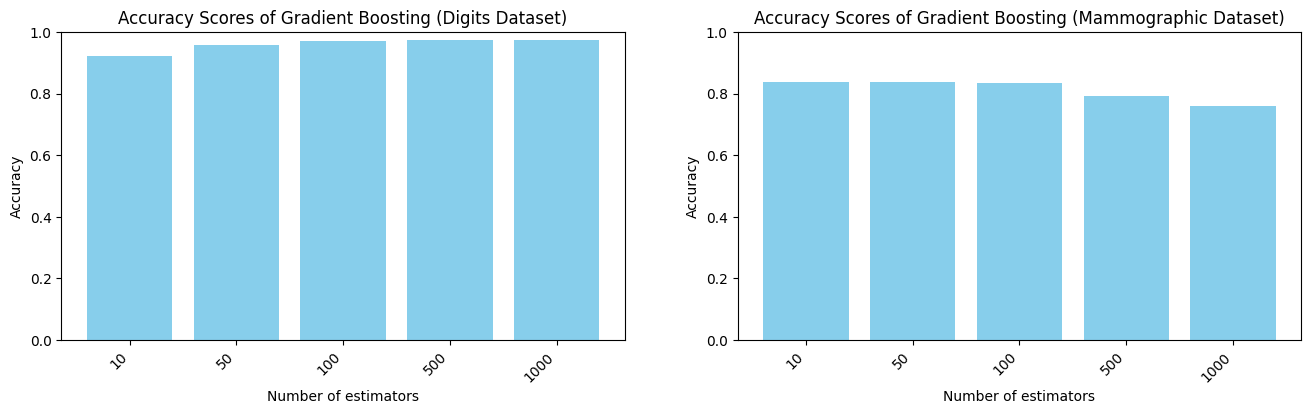

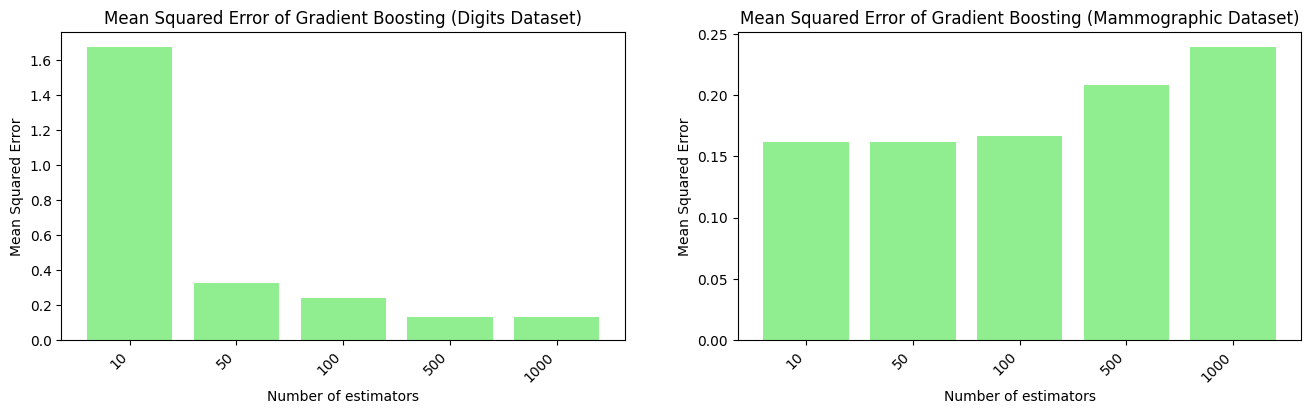

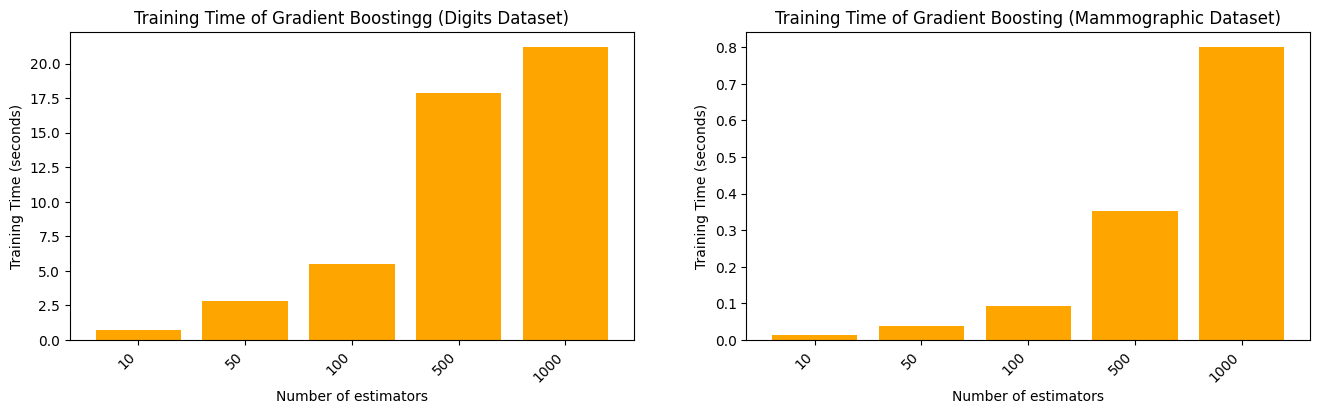

In [204]:
estimators = ['10','50','100','500','1000']
# Plot accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, accuracies_digits, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Gradient Boosting (Digits Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, accuracies_mammographic, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Gradient Boosting (Mammographic Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, mses_digits, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Gradient Boosting (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, mses_mammographic, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Gradient Boosting (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, times_digits, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Gradient Boostingg (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, times_mammographic, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Gradient Boosting (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [205]:
n_estimators = [10,50,100,500,1000]
times_digits = []
accuracies_digits = []
mses_digits = []
cross_vals_digits = []
for n_estimator in n_estimators:
    adaboost = AdaBoostClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    adaboost.fit(X_digits_train, y_digits_train)
    adaboost_training_time = time.time() - start_time
    times_digits.append(adaboost_training_time)
    y_digits_pred_adaboost = adaboost.predict(X_digits_test)
    accuracy_adaboost = accuracy_score(y_digits_test, y_digits_pred_adaboost)
    accuracies_digits.append(accuracy_adaboost)
    cross_val_scores_adaboost = cross_val_score(adaboost, X_digits, y_digits, cv=5)
    cross_vals_digits.append(cross_val_scores_adaboost)
    mse_adaboost = mean_squared_error(y_digits_test, y_digits_pred_adaboost)
    mses_digits.append(mse_adaboost)

In [206]:
times_mammographic = []
accuracies_mammographic = []
mses_mammographic = []
cross_vals_mammographic = []
for n_estimator in n_estimators:
    adaboost = AdaBoostClassifier(n_estimators=n_estimator, random_state=42)

    start_time = time.time()
    adaboost.fit(X_mammographic_train, y_mammographic_train)
    adaboost_training_time = time.time() - start_time
    times_mammographic.append(adaboost_training_time)
    y_mammographic_pred_adaboost = adaboost.predict(X_mammographic_test)
    accuracy_adaboost = accuracy_score(y_mammographic_test, y_mammographic_pred_adaboost)
    accuracies_mammographic.append(accuracy_adaboost)
    cross_val_scores_adaboost = cross_val_score(adaboost, X_mammographic, y_mammographic, cv=5)
    cross_vals_mammographic.append(cross_val_scores_adaboost)
    mse_adaboost = mean_squared_error(y_mammographic_test, y_mammographic_pred_adaboost)
    mses_mammographic.append(mse_adaboost)

In [207]:
for i in range(len(n_estimators)):
    print("Number of estimators = ", n_estimators[i])
    print("--------------------------------------------------------------------")
    print(f"AdaBoost Accuracy: {accuracies_digits[i]:.2f} (Digits), {accuracies_mammographic[i]:.2f} (Mammographic)")
    print(f"AdaBoost MSE: {mses_digits[i]:.2f} (Digits), {mses_mammographic[i]:.2f} (Mammographic)")
    print(f"AdaBoost Training Time: {times_digits[i]:.2f} (Digits), {times_mammographic[i]:.2f} (Mammographic)")
    print(f"AdaBoost Cross-validation Scores: {[round(cross_vals_digits[i][j],2) for j in range(5)]} (Digits), {[round(cross_vals_mammographic[i][j],2) for j in range(5)]} (Mammographic)\n")

Number of estimators =  10
--------------------------------------------------------------------
AdaBoost Accuracy: 0.22 (Digits), 0.83 (Mammographic)
AdaBoost MSE: 18.61 (Digits), 0.17 (Mammographic)
AdaBoost Training Time: 0.07 (Digits), 0.02 (Mammographic)
AdaBoost Cross-validation Scores: [0.28, 0.28, 0.28, 0.22, 0.28] (Digits), [0.81, 0.84, 0.86, 0.82, 0.76] (Mammographic)

Number of estimators =  50
--------------------------------------------------------------------
AdaBoost Accuracy: 0.22 (Digits), 0.82 (Mammographic)
AdaBoost MSE: 18.61 (Digits), 0.18 (Mammographic)
AdaBoost Training Time: 0.20 (Digits), 0.08 (Mammographic)
AdaBoost Cross-validation Scores: [0.28, 0.28, 0.28, 0.22, 0.28] (Digits), [0.82, 0.84, 0.85, 0.81, 0.76] (Mammographic)

Number of estimators =  100
--------------------------------------------------------------------
AdaBoost Accuracy: 0.22 (Digits), 0.83 (Mammographic)
AdaBoost MSE: 18.61 (Digits), 0.17 (Mammographic)
AdaBoost Training Time: 0.34 (Digits)

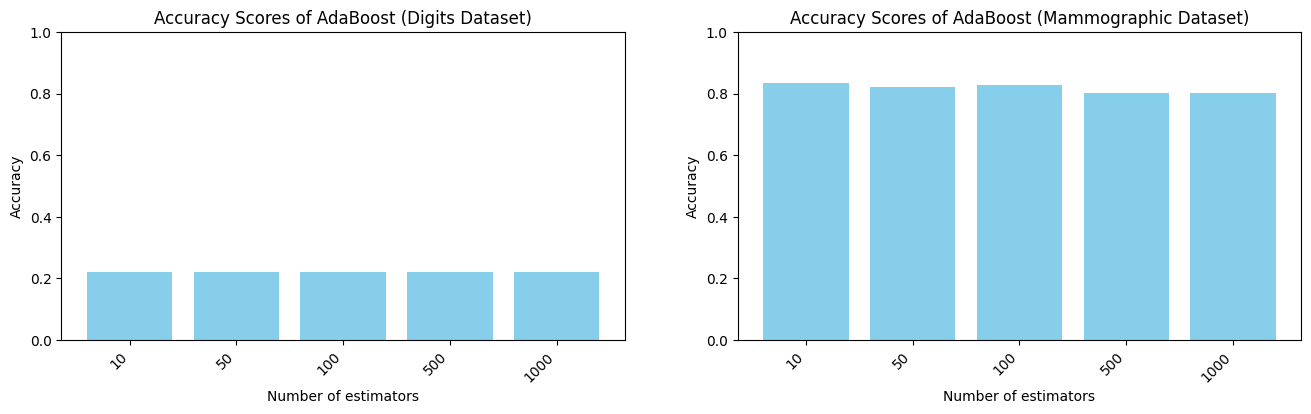

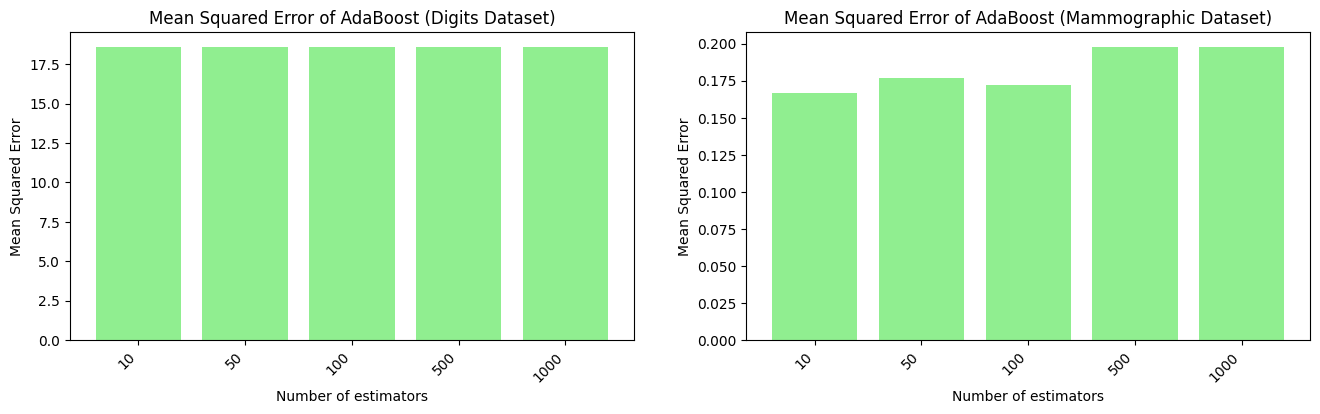

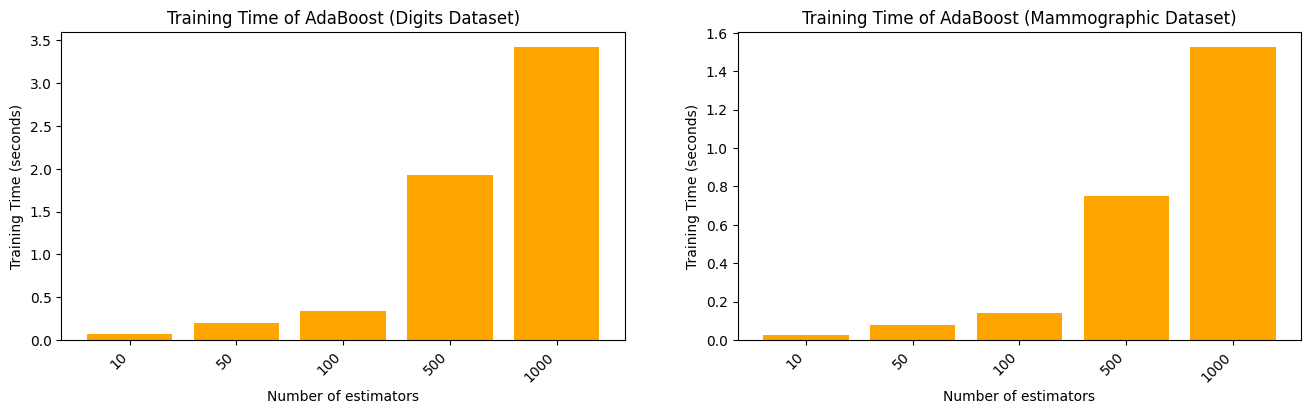

In [208]:
estimators = ['10','50','100','500','1000']
# Plot accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, accuracies_digits, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of AdaBoost (Digits Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, accuracies_mammographic, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of AdaBoost (Mammographic Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, mses_digits, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of AdaBoost (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, mses_mammographic, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of AdaBoost (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, times_digits, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of AdaBoost (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, times_mammographic, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of AdaBoost (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [209]:
estimators = [[('random_forest', random_forest),('bagging', bagging)],[('adaboost', adaboost),('gradient_boosting', gradient_boosting)],
              [('random_forest', random_forest),('adaboost', adaboost)],[('bagging', bagging),('gradient_boosting', gradient_boosting)],
              [('random_forest', random_forest),('gradient_boosting', gradient_boosting)]]
times_digits = []
accuracies_digits = []
mses_digits = []
cross_vals_digits = []
for estimator in estimators:
    voting = VotingClassifier(estimator)

    start_time = time.time()
    voting.fit(X_digits_train, y_digits_train)
    voting_training_time = time.time() - start_time
    times_digits.append(voting_training_time)
    y_digits_pred_voting = voting.predict(X_digits_test)
    accuracy_voting = accuracy_score(y_digits_test, y_digits_pred_voting)
    accuracies_digits.append(accuracy_voting)
    cross_val_scores_voting = cross_val_score(voting, X_digits, y_digits, cv=5)
    cross_vals_digits.append(cross_val_scores_voting)
    mse_voting = mean_squared_error(y_digits_test, y_digits_pred_voting)
    mses_digits.append(mse_voting)

In [210]:
times_mammographic = []
accuracies_mammographic = []
mses_mammographic = []
cross_vals_mammographic = []
for estimator in estimators:
    voting = VotingClassifier(estimator)

    start_time = time.time()
    voting.fit(X_mammographic_train, y_mammographic_train)
    voting_training_time = time.time() - start_time
    times_mammographic.append(voting_training_time)
    y_mammographic_pred_voting = voting.predict(X_mammographic_test)
    accuracy_voting = accuracy_score(y_mammographic_test, y_mammographic_pred_voting)
    accuracies_mammographic.append(accuracy_voting)
    cross_val_scores_voting = cross_val_score(voting, X_mammographic, y_mammographic, cv=5)
    cross_vals_mammographic.append(cross_val_scores_voting)
    mse_voting = mean_squared_error(y_mammographic_test, y_mammographic_pred_voting)
    mses_mammographic.append(mse_voting)

In [215]:
for i in range(len(estimators)):
    print("Estimators = ", estimators[i])
    print("--------------------------------------------------------------------")
    print(f"Voting Accuracy: {accuracies_digits[i]:.2f} (Digits), {accuracies_mammographic[i]:.2f} (Mammographic)")
    print(f"Voting MSE: {mses_digits[i]:.2f} (Digits), {mses_mammographic[i]:.2f} (Mammographic)")
    print(f"Voting Training Time: {times_digits[i]:.2f} (Digits), {times_mammographic[i]:.2f} (Mammographic)")
    print(f"Voting Cross-validation Scores: {[round(cross_vals_digits[i][j],2) for j in range(5)]} (Digits), {[round(cross_vals_mammographic[i][j],2) for j in range(5)]} (Mammographic)\n")

Estimators =  V1
(RF,Bagging)
--------------------------------------------------------------------
Voting Accuracy: 0.96 (Digits), 0.77 (Mammographic)
Voting MSE: 0.63 (Digits), 0.23 (Mammographic)
Voting Training Time: 17.53 (Digits), 3.10 (Mammographic)
Voting Cross-validation Scores: [0.93, 0.91, 0.96, 0.95, 0.91] (Digits), [0.78, 0.83, 0.84, 0.79, 0.76] (Mammographic)

Estimators =  V2
(AdaBoost,GradientBoosting)
--------------------------------------------------------------------
Voting Accuracy: 0.30 (Digits), 0.79 (Mammographic)
Voting MSE: 17.09 (Digits), 0.21 (Mammographic)
Voting Training Time: 32.06 (Digits), 2.27 (Mammographic)
Voting Cross-validation Scores: [0.33, 0.74, 0.82, 0.28, 0.3] (Digits), [0.8, 0.82, 0.83, 0.8, 0.75] (Mammographic)

Estimators =  V3
(RF,AdaBoost)
--------------------------------------------------------------------
Voting Accuracy: 0.29 (Digits), 0.81 (Mammographic)
Voting MSE: 17.14 (Digits), 0.19 (Mammographic)
Voting Training Time: 6.87 (Digits)

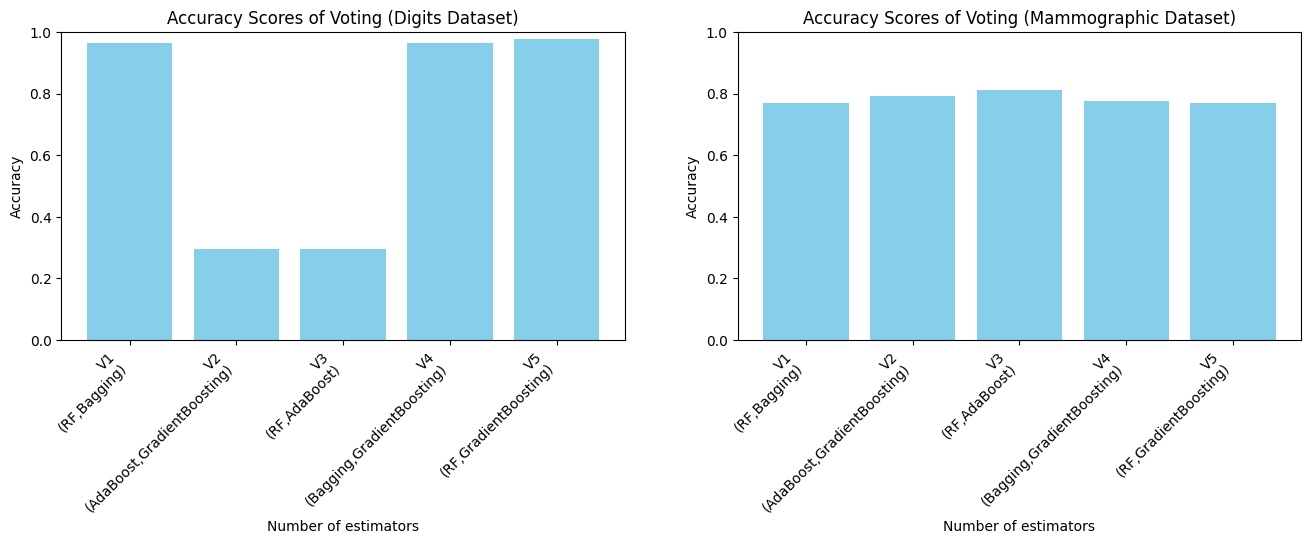

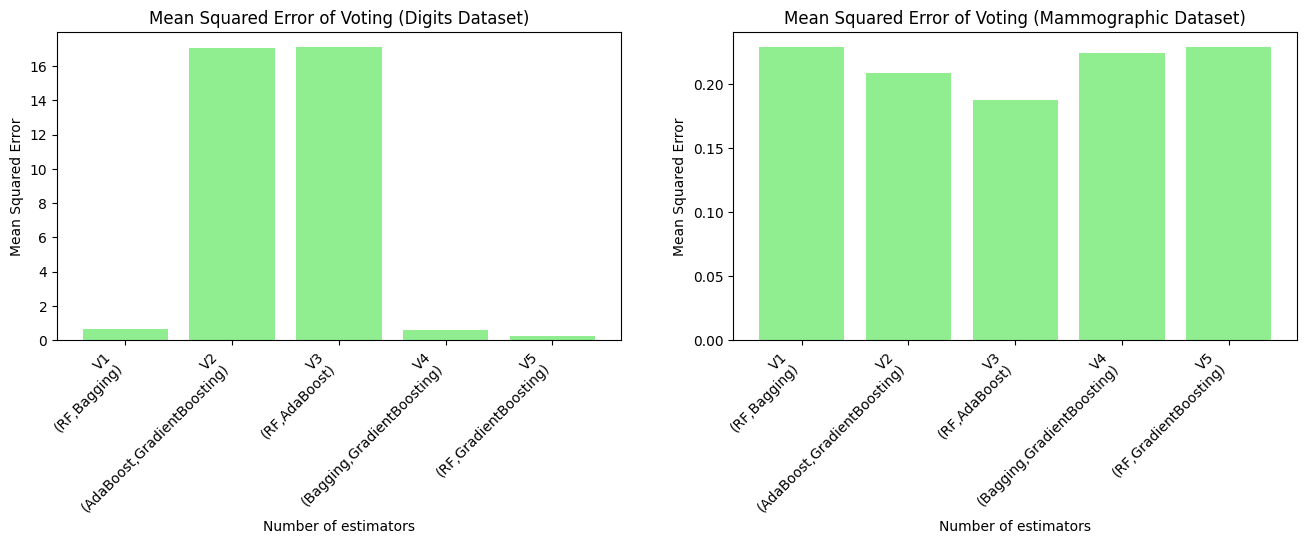

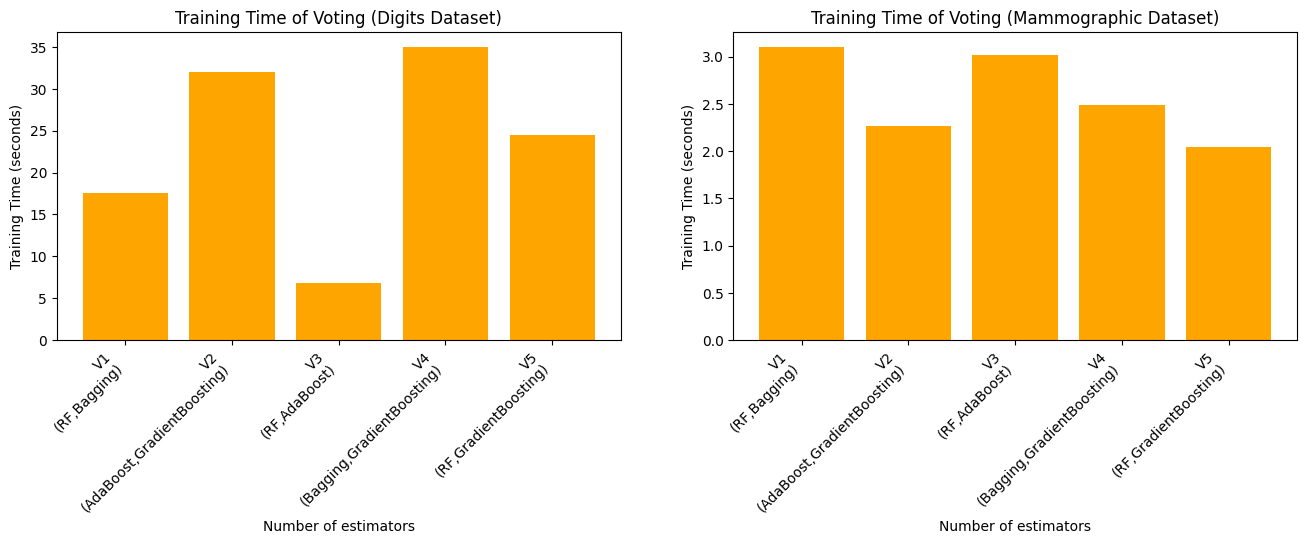

In [212]:
estimators = ['V1\n(RF,Bagging)','V2\n(AdaBoost,GradientBoosting)','V3\n(RF,AdaBoost)','V4\n(Bagging,GradientBoosting)','V5\n(RF,GradientBoosting)']
# Plot accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, accuracies_digits, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Voting (Digits Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, accuracies_mammographic, color='skyblue')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Voting (Mammographic Dataset)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot MSE
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, mses_digits, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Voting (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, mses_mammographic, color='lightgreen')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Voting (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot training time
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(estimators, times_digits, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Voting (Digits Dataset)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1,2,2)
plt.bar(estimators, times_mammographic, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Voting (Mammographic Dataset)')
plt.xticks(rotation=45, ha='right')
plt.show()